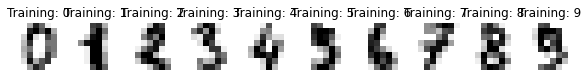

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
import numpy as np

digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [ ]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
nn = MLPClassifier(activation='logistic', solver='sgd', hidden_layer_sizes=(6,), random_state=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.8, shuffle=False
)


In [ ]:
nn.fit(X_train, y_train)
predicted = nn.predict(X_test)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


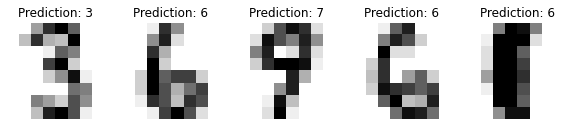

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [ ]:
y_test.size

1438

In [ ]:
predicted.size

1438

In [ ]:
def percentLoss(X, y):
    accumulator = 0
    for i in X:
        if X[i] != y[i]:
            accumulator = accumulator + 1
    return (100 * accumulator / X.size) 

In [ ]:
percentLoss(predicted, y_test)

18.70653685674548

This model was able to predict 81.3% of the test dataset. This is 8 times the amount that we would expect from random guessing.

Now lets do this over again but this time using kfold cross validation to choose the number of neurons

In [ ]:
def compute_classification_error(model, X, y):
    kf = KFold(n_splits=5)
    validation_errors = []
    for train_idx, test_idx in kf.split(X):
        split_X_train, split_X_valid = X[train_idx], X[test_idx]
        split_Y_train, split_Y_valid = y[train_idx], y[test_idx]
        model.fit(split_X_train, split_Y_train)
        error = percentLoss(split_Y_valid, model.predict(split_X_valid))
        validation_errors.append(error)
    return np.mean(validation_errors)

In [ ]:
digits.target.shape

(1797,)

In [ ]:
data.shape

(1797, 64)

In [166]:
layer_1_max_size = 76# chose this number because the target size*9/10
average_prediction_rate = []
for i in range(layer_1_max_size):
    nnModel = MLPClassifier(activation='logistic', solver='sgd', hidden_layer_sizes=(i + 1,), random_state=1)
    y = digits.target
    X = data
    average_prediction_rate.append(100.0 - compute_classification_error(nnModel, X, y))
print(average_prediction_rate.index(max(average_prediction_rate)) + 1)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

37


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
average_prediction_rate[0]

8.06669761683689

In [ ]:
average_prediction_rate[1]

41.95001547508512

In [ ]:
average_prediction_rate[2]

32.04456824512535

In [ ]:
average_prediction_rate[3]

48.02228412256267

In [ ]:
average_prediction_rate[4]

76.40064995357474

In [ ]:
average_prediction_rate[5]

72.177808727948

In [ ]:
average_prediction_rate[11]

90.10538532961931

In [ ]:
average_prediction_rate[20]

92.16666666666667

In [167]:
average_prediction_rate[36]

98.0

In [168]:
average_prediction_rate[35]

91.9942742185082

In [169]:
average_prediction_rate[37]

92.16666666666667

In [149]:
average_prediction_rate[75]

94.05555555555556